In [1]:
#Please execute this cell
import sys;
sys.path.append('../../'); 
import jupman;


# Matrices solutions

## [Download exercises zip](../../_static/matrices-exercises.zip)

[Browse files online](https://github.com/DavidLeoni/datasciprolab/tree/master/exercises/matrices)



## What to do

- unzip exercises in a folder, you should get something like this: 

```

-jupman.py
-sciprog.py
-other stuff ...
-exercises
     |- matrices
         |- matrices-exercise.ipynb     
         |- matrices-solution.ipynb
         |- other stuff ..
```

<div class="alert alert-warning">

**WARNING**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. The browser should show a file list: navigate the list and open the notebook `exercises/basic-data-structures/matrices-exercise.ipynb`
- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`





## Matrices as lists of lists

Python natively does not provide easy and efficient ways to manipulate matrices. To do so, you would need an external library called numpy which will be seen later in the course. For now we will limit ourselves to using matrices as lists of lists because


1. lists are pervasive in Python, you will probably encounter matrices expressed as lists of lists anyway
2. you get an idea of how to construct a nested data structure
3. we can discuss memory referencies and copies along the way
4. even if numpy internal representation is different, it prints matrices as they were lists of lists


So let's see these lists of lists.For example, we can consider the following a matrix with 3 rows and 2 columns, or in short 3x2 matrix:

In [2]:
m = [
        ['a','b'],
        ['c','d'],
        ['a','e']    
    ]

For convenience, we assume as input to our functions there won't be matrices with no rows, nor rows with no columns. 

Going back to the example, in practice we have a big external list:

```python
m = [


]
```

and each of its elements is another list which represents a row:

```python
m = [
        ['a','b'],
        ['c','d'],
        ['a','e']
    ]
```

So, to access the whole first row `['a','b']`, we would simply access the element at index 0 of the external list `m`:

In [3]:
m[0]

['a', 'b']

To access the second whole second row `['c','d']`, we would access the element at index 1 of the external list `m`:

In [4]:
m[1]

['c', 'd']

To access the second whole third row `['c','d']`, we would access the element at index 2 of the external list `m`:

In [5]:
m[2]

['a', 'e']

To access the first element `'a'` of the first row `['a','b']` we would add another subscript operator with index 0:

In [6]:
m[0][0]

'a'

To access the second elemnt `'b'` of the first row `['a','b']` we would use instead index 1 :

In [7]:
m[0][1]

'b'

<div class="alert alert-warning" >

**WARNING**: When a matrix is a list of lists, you can only access values with notation `m[i][j]`, **NOT** with `m[i,j]` !!
</div>

In [8]:
# write here the wrong notation m[0,0] and see which error you get:


### Matrix dimensions

**EXERCISE**: For getting matrix dimensions, we can use normal list operations. Which ones? You can assume the matrix is well formed (all rows have equal length) and has at least one row and at least one column

In [9]:
m = [
        ['a','b'],
        ['c','d'],
        ['a','e']    
    ]

In [10]:
# write here code for printing rows and columns

# the outer list is a list of rows, so to count htem we just use len(m)

print("rows")
print(len(m))

# if we assume the matrix is well formed and has at least one row and column, we can directly check the length
# of the first row

print("columns")
print(len(m[0]))

rows
3
columns
2


**Implementation**

Now implement the following functions. 

<div class="alert alert-info">

**REMEMBER**: if the cell is executed and nothing happens, it is because all the assert tests have worked! In such case you probably wrote correct code but careful, these kind of tests are never exhaustive so you could have still made some error.
</div>

<div class="alert alert-info" >

**COMMANDMENT 4: You shall never ever reassign function parameters**
</div>

```python

    def myfun(i, s, L, D):

        # You shall not do any of such evil, no matter what the type of the parameter is:
        i = 666            # basic types (int, float, ...)
        s = "666"          # strings
        L = [666]          # containers 
        D = {"evil":666}   # dictionaries

        # For the sole case of composite parameters like lists or dictionaries, 
        # you can write stuff like this IF AND ONLY IF the function specification 
        # requires you to modify the parameter internal elements (i.e. sorting a list
        # or changing a dictionary field):

        L[4] = 2             # list
        D["my field"] = 5    # dictionary
        C.my_field = 7       # class
```


<div class="alert alert-info" >

**COMMANDMENT 7: You shall use `return` command only if you see written _return_ in the function description!**
</div>

If there is no `return` in function description, the function is intended to return `None`. In this case you don't even need to write `return None`, as Python will do it implicitly for you.



### extract_row

One of the first things you might want to do is to extract the i-th row. If you're implementing a function that does this, you have basically two choices. Either you 

1. return a _pointer_ to the _original_ row
2. return a  _copy_ of the row. 

Since a copy consumes memory, why should you ever want to return a copy? Sometimes you should because you don't know which use will be done of the data structure. For example, suppose you got a book of exercises which has empty spaces to write exercises in. It's such a great book everybody in the classroom wants to read it - but you are afraid if the book starts changing hands some careless guy might write on it. To avoid problems, you make a copy of the book and distribute it (let's leave copyright infringment matters aside :-)

### extract_row_pointer

So first let's see what happens when you just return a _pointer_ to the _original_ row. 

**NOTE**: For convenience, at the end of the cell we put a magic call to `jupman.pytut()` which shows the code execution like in Python tutor (for further info about `jupman.pytut()`, [see here](introduction.ipynb#Python-tutor-inside-Jupyter)). If execute all the code in Python tutor, you will see that at the end you have two arrow pointers to the row `['a','b']`, one starting from `m` list and one from `row` variable.


In [11]:
def extract_row_pointer(mat, i):
    """ RETURN the ith row from mat. 
        NOTE: the row MUST be a new list! To create a new list use a for cycle.
    """
    return mat[i]

    
m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]

row = extract_row_pointer(m, 0)


jupman.pytut()

### extract_row_f

Now try to implement a version which returns a copy of the row. 


You might be tempted to  implement something like this: 

In [12]:
# WARNING: WRONG CODE!!!!
# It is adding a LIST as element to another empty list. 
# In other words, it is wrapping the row (which is already a list) into another list. 

def extract_row(mat, i):
    """ RETURN the ith row from mat. NOTE: the row MUST be a new list ! """
    
    riga = []
    riga.append(mat[i])  
    return riga


# Let's check the problem in Python tutor! You will see an arrow going from row to a list of one element 
# which will contain exactly one arrow to the original row.
    
m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]

row = extract_row(m,0)

jupman.pytut()

You can build an actual copy in several ways, with a for, a slice or a list comprehension. Try to implement all versions, starting with the for here. Be sure to check your result with Python tutor - to visualize python tutor inside the cell output, you might use the special command `jupman.pytut()` at the end of the cell as we did before. If you run the code with Python tutor, you should see only _one_ arrow going to the original `['a','b']` row in `m`, and there should be _another_ `['a','b']` copy somewhere, with `row` variable pointing to it. 

In [13]:
def extract_row_f(mat, i):
    """ RETURN the ith row from mat. 
        NOTE: the row MUST be a new list! To create a new list use a for cycle 
              which iterates over the elements, _not_ the indexes (so don't use range!)
    """
    #jupman-raise
    riga = []
    for x in mat[i]:
        riga.append(x) 
    return riga    
    #/jupman-raise
    
m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]

assert extract_row_f(m, 0) == ['a','b']
assert extract_row_f(m, 1) == ['c','d']
assert extract_row_f(m, 2) == ['a','e']

# check it didn't change the original matrix !
r = extract_row_f(m, 0)
r[0] = 'z'
assert m[0][0] == 'a'   

# uncomment if you want to visualize execution here (you need to be online for this to work)
#jupman.pytut()

### extract_row_fr

Now try to iterate over a range of row indexes. Let's have a quick look at `range(n)`. Maybe you think it should return a sequence of integers, from zero to `n - 1`. Does it?

In [14]:
range(5)

range(0, 5)

Maybe you expected to see something like a list `[0,1,2,3,4]`, instead we just discovered Python is pretty lazy here: `range(n)` actually returns an  _iterabile_ object, not a real sequence materialized in memory.

To get an actual list of integers, we must explicitly ask this iterable object to give us the numbers one by one. 

When you write `for i in range(5)` the for cycle is doing exactly this, at each round it is asking the range object to generate a number in the sequence. If we want the whole sequence materialized in memory, we can generate it by converting the range to a list object:

In [15]:
list(range(5))

[0, 1, 2, 3, 4]

Be careful, though. Depending on the size of the sequence, this might be dangerous. A list of billion elements might saturate the RAM of your computer (as of 2018 laptops come with 4 gigabytes of RAM memory, that is 4 billion of bytes). 

Now implement the `extract_row_fr` iterating over a range of row indexes:

In [16]:
def extract_row_fr(mat, i):
    """ RETURN the ith row from mat. 
        NOTE: the row MUST be a new list! To create a new list use a for cycle 
              which iterates over the indexes, _not_ the elements (so use range!)
    """
    #jupman-raise
    riga = []
    for j in range(len(mat[0])):
        riga.append(mat[i][j]) 
    return riga    
    #/jupman-raise
    
m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]

assert extract_row_fr(m, 0) == ['a','b']
assert extract_row_fr(m, 1) == ['c','d']
assert extract_row_fr(m, 2) == ['a','e']

# check it didn't change the original matrix !
r = extract_row_fr(m, 0)
r[0] = 'z'
assert m[0][0] == 'a'   

# uncomment if you want to visualize execution here (you need to be online for this to work)
#jupman.pytut()

### extract_row_s

Remember slices return a _copy_ of a list? Now try to use them.

In [17]:
def extract_row_s(mat, i):
    """ RETURN the ith row from mat. 
        NOTE: the row MUST be a new list! To create a new list use slices.
    """
    #jupman-raise
    return mat[i][:]  # if you omit start end end indexes, you get a copy of the whole list
    #/jupman-raise
    
m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]


assert extract_row_s(m, 0) == ['a','b']
assert extract_row_s(m, 1) == ['c','d']
assert extract_row_s(m, 2) == ['a','e']

# check it didn't change the original matrix !
r = extract_row_s(m, 0)
r[0] = 'z'
assert m[0][0] == 'a'   

# uncomment if you want to visualize execution here (you need to be online for this to work)
#jupman.pytut()

### extract_row_c

Try now to use list comprehensions.

In [18]:
def extract_row_c(mat, i):
    """ RETURN the ith row from mat. 
        NOTE: the row MUST be a new list! To create a new list use list comprehension.
    """
    #jupman-raise
    return [x for x in mat[i]]
    #/jupman-raise
    
m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]


assert extract_row_c(m, 0) == ['a','b']
assert extract_row_c(m, 1) == ['c','d']
assert extract_row_c(m, 2) == ['a','e']

# check it didn't change the original matrix !
r = extract_row_c(m, 0)
r[0] = 'z'
assert m[0][0] == 'a'   

# uncomment if you want to visualize execution here (you need to be online for this to work)
#jupman.pytut()

### extract_col_f

Now we can try to extract a column at `j`th position. This time we will be forced to create a new list, so we don't  have to wonder if we need to return a pointer or a copy.

In [19]:
def extract_col_f(mat, j):
    """ RETURN the jth column from mat. To create it, use a for  """
    
    #jupman-raise
    ret = []
    for row in mat: 
        ret.append(row[j])
    return ret
    #/jupman-raise

m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]

assert extract_col_f(m, 0) == ['a','c','a']
assert extract_col_f(m, 1) == ['b','d','e']

# check returned column does not modify m
c = extract_col_f(m,0)
c[0] = 'z'
assert m[0][0] == 'a'

# uncomment if you want to visualize execution here (you need to be online for this to work)
#jupman.pytut()

### extract_col_c

In [20]:
def extract_col_c(mat, j):
    """ RETURN the jth column from mat. To create it, use a list comprehension  """
    
    #jupman-raise
    return [row[j] for row in mat] 
    #/jupman-raise

m = [
      ['a','b'],
      ['c','d'],
      ['a','e'],    
]

assert extract_col_c(m, 0) == ['a','c','a']
assert extract_col_c(m, 1) == ['b','d','e']

# check returned column does not modify m
c = extract_col_c(m,0)
c[0] = 'z'
assert m[0][0] == 'a'

# uncomment if you want to visualize execution here (you need to be online for this to work)
#jupman.pytut()

### deep_clone

Let's try to produce a _complete_ clone of the matrix, also called a _deep clone_, by creating a copy of the external list _and_ also the internal lists representing the rows.

You might be tempted to write code like this:

In [21]:

# WARNING: WRONG CODE
def deep_clone_wrong(mat):
    """ RETURN a NEW list of lists which is a COMPLETE DEEP clone
        of mat (which is a list of lists)
    """
    return mat[:] # NOT SUFFICIENT !
                  # This is a SHALLOW clone, it's only copying the _external_ list
                  # and not also the internal ones !

m = [
        ['a','b'],
        ['b','d']
    ]       
        
res = deep_clone_wrong(m)

# Notice you will have arrows in res list going to the _original_ mat. We don't want this !
jupman.pytut()

To fix the above code, you will need to iterate through the rows and _for each_ row create a copy of that row.

In [22]:

def deep_clone(mat):
    """ RETURN a NEW list of lists which is a COMPLETE DEEP clone
        of mat (which is a list of lists)
    """
    #jupman-raise
    
    ret = []
    for row in mat:
        ret.append(row[:])
    return ret
    #/jupman-raise

m = [
        ['a','b'],
        ['b','d']
    ]

res = [
        ['a','b'],
        ['b','d']
    ]

# verify the copy
c = deep_clone(m)
assert c == res

# verify it is a DEEP copy (that is, it created also clones of the rows!)
c[0][0] = 'z'
assert m[0][0] == 'a'


### stitch_down



In [23]:
def stitch_down(mat1, mat2):
    """Given matrices mat1 and mat2  as list of lists, with mat1 of size u x n and mat2 of size d x n,
       RETURN a NEW matrix of size (u+d) x n as list of lists, by stitching second mat to the bottom of mat1
       NOTE: by NEW matrix we intend a matrix with no pointers to original rows (see previous deep clone exercise)
    """
    #jupman-raise
    res = []
    for row in mat1:
        res.append(row[:])
    for row in mat2:
        res.append(row[:])
    return res
    #/jupman-raise
    
m1 = [
        ['a']
     ]
m2 = [
        ['b']
     ]
assert stitch_down(m1, m2) == [
                                ['a'],
                                ['b']
                              ]

# check we are giving back a deep clone
s = stitch_down(m1, m2)
s[0][0] = 'z'
assert m1[0][0] == 'a' 

m1 = [
        ['a','b','c'],
        ['d','b','a']
     ]
m2 = [
        ['f','b', 'h'],
        ['g','h', 'w']
     ]

res = [
        ['a','b','c'],
        ['d','b','a'],
        ['f','b','h'],
        ['g','h','w']
     ]

assert stitch_down(m1, m2) == res



In [24]:
def stitch_up(mat1, mat2):
    """Given matrices mat1 and mat2  as list of lists, with mat1 of size u x n and mat2 of size d x n,
       RETURN a NEW matrix of size (u+d) x n as list of lists, by stitching first mat to the bottom of mat2
       NOTE: by NEW matrix we intend a matrix with no pointers to original rows (see previous deep clone exercise)
       To implement this function, use a call to the method stitch_down you implemented before.
    """
    #jupman-raise
    return stitch_down(mat2, mat1)
    #/jupman-raise
    
m1 = [
        ['a']
     ]
m2 = [
        ['b']
     ]
assert stitch_up(m1, m2) == [
                                ['b'],
                                ['a']
                              ]

# check we are giving back a deep clone
s = stitch_up(m1, m2)
s[0][0] = 'z'
assert m1[0][0] == 'a'     
    
m1 = [
        ['a','b','c'],
        ['d','b','a']
     ]
m2 = [
        ['f','b', 'h'],
        ['g','h', 'w']
     ]

res = [
        ['f','b','h'],
        ['g','h','w'],
        ['a','b','c'],
        ['d','b','a']
     ]

assert stitch_up(m1, m2) == res

In [25]:

def stitch_right(mat1,mat2):
    """Given matrices mat1 and mat2  as list of lists, with mat1 of size n x l and mat2 of size n x r, 
       RETURN a NEW matrix of size n x (l + r) as list of lists, by stitching second mat to the right end of mat1
    """
    #jupman-raise
    ret = []
    for i in range(len(mat1)):
        row_to_add =  mat1[i][:]
        row_to_add.extend(mat2[i])
        ret.append(row_to_add)
    return ret
    #/jupman-raise
    

m1 = [
        ['a','b','c'],
        ['d','b','a']
     ]
m2 = [
        ['f','b'],
        ['g','h']
     ]

res = [
        ['a','b','c','f','b'],
        ['d','b','a','g','h']
      ]

assert stitch_right(m1, m2) == res

### stitch_left_mod

This time let's try to _modify_ `mat1` _in place_, by stitching `mat2` _to the left_ of `mat1`.

So this time **don't** put a `return` instruction.

In [26]:
def stitch_left_mod(mat1,mat2):
    """Given matrices mat1 and mat2  as list of lists, with mat1 of size n x l and mat2 of size n x r, 
       MODIFIES mat1 so that it becomes of size n x (l + r), by stitching second mat to the left of mat1
       NOTE: this can be tricky: you will need to perform list insertion. There are many ways to do it in Python,
             one could be using the weird splice assignment insertion  mylist[0:0] = list_to_insert  
             see here for more info: https://stackoverflow.com/a/10623383
    """
    #jupman-raise    
    for i in range(len(mat1)):
        mat1[i][0:0] = mat2[i]
    #/jupman-raise
    

m1 = [
        ['a','b','c'],
        ['d','b','a']
     ]
m2 = [
        ['f','b'],
        ['g','h']
     ]

res = [
        ['f','b','a','b','c'],
        ['g','h','d','b','a']
     ]

stitch_left_mod(m1, m2) 
assert m1 == res


### Exceptions and parameter checking

Let's look at a parameter validation example (it is not an exercise). 

If we wanted to implement a function `mydiv(a,b)` which divides `a` by `b` we could check inside that b is not zero. If it is, we might abruptly stop the function raising a [ValueError](https://docs.python.org/3/library/exceptions.html#ValueError). In this case the division by zero actually has already a very specific [ZeroDivisionError](https://docs.python.org/3/library/exceptions.html#ZeroDivisionError), but for the sake of the example we will raise a `ValueError`.


In [27]:
def mydiv(a,b): 
    """ Divides a by b. If b is zero, raises a ValueError
    """
    if b == 0:
        raise ValueError("Invalid divisor 0")
    return a / b

# to check the function actually raises ValueError when called, we might write a quick test like this:

try: 
    mydiv(3,0)
    raise Exception("SHOULD HAVE FAILED !")  # if mydiv raises an exception which is ValueError as we expect it to do,
                                             # the code should never arrive here
except ValueError: # this only catches ValueError. Other types of errors are not catched
    "passed test"  # In an except clause you always need to put some code. 
                   # Here we put a placeholder string just to fill in
         
            
assert mydiv(6,2) == 3

### diag

`diag` extracts the diagonal of a matrix. To do so,  `diag` requires an nxn matrix as input. To make sure we actually get an nxn matrix, this time you will have to validate the input, that is check if the number of rows is equal to the number of columns (as always we assume the matrix has at least one row and at least one column). If the matrix is not nxn, the function should stop raising an exception. In particular, it shoud raise a [ValueError](https://docs.python.org/3/library/exceptions.html#ValueError), which is the standard Python exception to raise when the expected input is not correct and you can't find any other more specific error.

Just for illustrative puroposes, we show here the index numbers `i` and `j` and avoid putting apices around strings:

```
    \ j  0,1,2,3  
    i 
       [
    0   [a,b,c,d],
    1   [e,f,g,h],
    2   [p,q,r,s],
    3   [t,u,v,z]
       ]
```

Let's see a step by step execution:

```
                                \ j  0,1,2,3  
                                i 
                                   [
 extract from row at i=0  -->   0   [a,b,c,d],        'a' is extracted from  mat[0][0]
                                1   [e,f,g,h],
                                2   [p,q,r,s],
                                3   [t,u,v,z]
                                   ]
```

```
                                \ j  0,1,2,3  
                                i 
                                   [
                                0   [a,b,c,d],           
 extract from row at i=1  -->   1   [e,f,g,h],        'f' is extracted from mat[1][1]
                                2   [p,q,r,s], 
                                3   [t,u,v,z]
                                   ]
```

```
                                \ j  0,1,2,3  
                                i 
                                   [
                                0   [a,b,c,d],           
                                1   [e,f,g,h],
 extract from row at i=2  -->   2   [p,q,r,s],        'r' is extracted from mat[2][2]
                                3   [t,u,v,z]
                                   ]
```

```
                                \ j  0,1,2,3  
                                i 
                                   [
                                0   [a,b,c,d],           
                                1   [e,f,g,h],
                                2   [p,q,r,s],
 extract from row at i=3  -->   3   [t,u,v,z]         'z' is extracted from mat[3][3]
                                   ]
```

There are two ways to solve this exercise, one is to use a double for (a nested for to be precise) while the other method uses only one for. Try to solve it in both ways. How many steps do you need with double for? and with only one?

<div class="alert alert-info">

**About perfomances**

For the purposes of the first part of the course, performance considerations won't be part of the evaluation. So if all the tests run in a decent time on your laptop (and the code is actually correct!), then the exercise is considered solved, even if there are better algorithmic ways to solve it. Typically in this first part you won't have many performance problems, except when we will deal with 100 mb files - in that cases you will be forced to use the right method otherwise your laptop will just keep keep heating without spitting out results) 

In the second part of the course, we will consider performance indeed, so in that part using a double for would be considered an unacceptable waste.
</div>

In [28]:

def diag(mat):
    """ Given an nxn matrix mat as a list of lists, RETURN a list which contains the elemets in the diagonal
        (top left to bottom right corner). 
        - if mat is not nxn raise ValueError
    """
    #jupman-raise
    if len(mat) != len(mat[0]):
        raise ValueError("Matrix should be nxn, found instead %s x %s" % (len(mat), len(mat[0])))
    ret = []
    for i in range(len(mat)):
        ret.append(mat[i][i])
    return ret
    #/jupman-raise

m = [
        ['a','b','c'],
        ['d','e','f'],
        ['g','h','i']
     ]

assert diag(m) == ['a','e','i']

try: 
    diag([              # 1x2 dimension, not square
           ['a','b']   
         ])  
    raise Exception("SHOULD HAVE FAILED !")  # if diag raises an exception which is ValueError as we expect it to do,
                                             # the code should never arrive here
except ValueError: # this only catches ValueError. Other types of errors are not catched
    "passed test"  # In an except clause you always need to put some code. 
                   # Here we put a placeholder string just to fill in



### anti_diag

In [29]:
def anti_diag(mat):
    """ Given an nxn matrix mat as a list of lists, RETURN a list which contains the elemets in the antidiagonal
    (top right to bottom left corner). If mat is not nxn raise ValueError
    """
    #jupman-raise
    n = len(mat)
    ret = []
    for i in range(n):
        ret.append(mat[i][n-i-1])
    return ret
    #/jupman-raise

m = [
        ['a','b','c'],
        ['d','e','f'],
        ['g','h','i']
     ]

assert anti_diag(m) == ['c','e','g']

# If you have doubts about the indexes remember to try it in python tutor !
# jupman.pytut()

### is_utriang

You will now try to iterate only the lower triangular half of a matrix. Let's look at an example:


In [30]:
m = [
        [3,2,5,8],
        [0,6,2,3],
        [0,0,4,9],
        [0,0,0,5]
    ]

Just for illustrative puroposes, we show here the index numbers `i` and `j`:
```
    \ j  0,1,2,3  
    i 
       [
    0   [3,2,5,8],
    1   [0,6,2,3],
    2   [0,0,4,9],
    3   [0,7,0,5]
       ]
```

Let's see a step by step execution an a non-upper triangular matrix:

```
                                \ j  0,1,2,3  
                                i 
                                   [
                                0   [3,2,5,8],
start from row at index i=1 ->  1   [0,6,2,3],      Check until column limit j=0 included
                                2   [0,0,4,9],
                                3   [0,7,0,5]
                                   ]
```

One zero is found, time to check next row.

```
                                \ j  0,1,2,3  
                                i 
                                   [
                                0   [3,2,5,8],
                                1   [0,6,2,3],
check row at index i=2    --->  2   [0,0,4,9],      Check until column limit j=1 included
                                3   [0,7,0,5]
                                   ]
```

Two zeros are found. Time to check next row.

```
                                \ j  0,1,2,3  
                                i 
                                   [
                                0   [3,2,5,8],
                                1   [0,6,2,3],
                                2   [0,0,4,9],
check row at index i=3    --->  3   [0,7,0,5]       Check until column limit j=2 included
                                   ]                BUT can stop sooner at j=1 because number at j=1
                                                    is different from zero. As soon as 7 is found, can return False
                                                    In this case the matrix is not upper triangular

```

When you develop these algorithms, it is fundamental to write down a step by step example like the above to get a clear picture of what is happening. Also, if you write down the indeces correctly, you will easily be able to derive a generalization. To find it, try to further write the found indeces in a table. 

For example, from above for each row index `i` we can easily find out  which limit index `j` we need to reach for our hunt for zeros:

```
| i | limit j (included) |            Notes                | 
|---|--------------------|---------------------------------|
| 1 |          0         |  we start from row at index i=1 |
| 2 |          1         |                                 |
| 3 |          2         |                                 |
```

From the table, we can see the limit for j can be calculated in terms of the current row index `i` with the simple formula `i - 1`

The fact you need to span through rows and columns suggest you need two `for`s, one for rows and one for columns - that is, a _nested for_. 

* please use ranges of indexes to carry out the task (no `for row in mat` ..)
* please use letter `i` as index for rows, `j` as index of columns and in case you need it `n` letter as matrix dimension

HINT 1: remember you can set range to start from a specific index, like `range(3,7)` will start from 3 and end to 6 _included_ (last 7 is _excluded_!)
HINT 2: To implement this, it is best looking for numbers _different_ from zero. As soon as you find
        one, you can stop the function and return False. Only after _all_ the number checking 
        is done you can return True.

In [31]:
def is_utriang(mat):
    """ Takes a RETURN True if the provided nxn matrix is upper triangular, that is, has all the entries 
        below the diagonal set to zero. Return False otherwise.
    """
    #jupman-raise
    n = len(mat)
    m = len(mat[0])
    
    for i in range(1,n):
        for j in range(i): # notice it arrives until i *excluded*, that is, arrives to i - 1 *included*
            if mat[i][j] != 0:
                return False
    return True
    #/jupman-raise
    
assert is_utriang([
                    [1]
                  ]) == True
assert is_utriang([
    [3,2,5],
    [0,6,2],
    [0,0,4]
]) == True

assert is_utriang([
    [3,2,5],
    [0,6,2],
    [1,0,4]
]) == False

assert is_utriang([
    [3,2,5],
    [0,6,2],
    [1,1,4]
]) == False

assert is_utriang([
    [3,2,5],
    [0,6,2],
    [0,1,4]
]) == False


assert is_utriang([
    [3,2,5],
    [1,6,2],
    [1,0,4]
]) == False


### transpose_1

Transpose a matrix _in-place_. The transpose $M^T$ of a matrix $M$ is defined as 

$M^T[i][j] = M[j][i]$

The definition is simple yet implementation might be tricky. If you're not careful, you could easily end up swapping the values twice and get the same original matrix. To prevent this, iterate only the upper triangular part of the matrix and remember `range` funciton can also have a start index:

In [32]:
list(range(3,7))

[3, 4, 5, 6]

Also, make sure you know how to swap just two values by solving first this very simple exercise - also check the result in Python Tutor

In [33]:
x = 3
y = 7

# write here code for swapping x and y (don't directly use the constants 3 and 7!)

k = x   
x = y
y = k

jupman.pytut()

Going back to the transpose, for now we will consider only an nxn matrix. To make sure we actually get an nxn matrix, this time you will have to validate the input, that is check if the number of rows is equal to the number of columns (as always we assume the matrix has at least one row and at least one column). If the matrix is not nxn, the function should stop raising an exception. In particular, it shoud raise a [ValueError](https://docs.python.org/3/library/exceptions.html#ValueError), which is the standard Python exception to raise when the expected input is not correct and you can't find any other more specific error.


In [34]:
def transpose_1(mat):
    """ MODIFIES given nxn matrix mat by transposing it in-place. 
        If the matrix is not nxn, raises a ValueError
    """
    #jupman-raise
    if len(mat) != len(mat[0]):
        raise ValueError("Matrix should be nxn, found instead %s x %s" % (len(mat), len(mat[0])))
    for i in range(len(mat)):
        for j in range(i+1,len(mat[i])):
            el = m[i][j]
            mat[i][j] = m[j][i]
            mat[j][i] = el
    #/jupman-raise
         
        
# let's try wrong matrix dimensions: 

try: 
    transpose_1([
                [3,5]
              ])
    raise Exception("SHOULD HAVE FAILED !")
except ValueError:
    "passed test"
            
m = [
        ['a']
    ]

transpose_1(m)
assert m == [
    ['a']
]

m = [
        ['a','b'],
        ['c','d']
    ]

transpose_1(m)
assert m == [
                ['a','c'],
                ['b','d']
            ]


### empty matrices

To create a new empty 3x5 matrix as lists of lists which contains zeros, you can use the following command, which combines 

To create a new list of 3 elements filled with zeros, you can write like this:

In [35]:
[0]*3

[0, 0, 0]

The `*` is kind of multiplying the elements in a list

Given the above, to create a 5x3 matrix  filled with zeros, which is a list of seemingly equal lists, you might then be tempted to write like this:

In [36]:
# WRONG
[[0]*3]*5

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

Why is that (possibly) wrong? Let's try to inspect it in Python tutor: 

In [37]:
bad = [[0]*3]*5
jupman.pytut()

If you look closely, you will see many arrows pointing to the same list of 3 zeros. This means that if we change one number, we will apparently change 5 of them in the whole column !

The right way to create a matrix as list of lists with zeroes is the following:

In [38]:
# CORRECT 
[[0]*3 for i in range(5)]

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

### transpose_2

Now let's try to transpose a generic nxm matrix. This time for simplicity we will return a whole new matrix.


In [39]:
def transpose_2(mat):
    """ RETURN a NEW mxn matrix which is the transpose of the given nxm matrix mat as list of lists.
    """
    #jupman-raise
    n = len(mat)
    m = len(mat[0])
    ret = [[0]*n for i in range(m)]
    for i in range(n):
        for j in range(m):
            ret[j][i] = mat[i][j]
    return ret
    #/jupman-raise

m = [
        ['a']
    ]

t = transpose_2(m)

assert  t == [
                            ['a']
                         ]
t[0][0] = 'z'
assert m[0][0] == 'a'

m = [
        ['a','b','c'],
        ['d','e','f']
    ]

assert transpose_2(m) == [
                ['a','d'],
                ['b','e'],
                ['c','f'],    
            ]


### swap_rows



In [40]:
def swap_rows(mat, i1, i2):
    """Takes a matrix as list of lists, and RETURN a NEW matrix where rows at indexes i1 and i2 are swapped
    """
    #jupman-raise
    
    # deep clones
    ret = []
    for row in mat:
        ret.append(row[:])
    #swaps
    s = ret[i1]
    ret[i1] = ret[i2]
    ret[i2] = s
    return ret
    #/jupman-raise

m = [
        ['a','d'],
        ['b','e'],
        ['c','f']    
    ]

res = swap_rows(m, 0, 2)

assert res == [
        ['c','f'],    
        ['b','e'],
        ['a','d']
]

res[0][0] = 'z'
assert m[0][0] == 'a'


m = [
        ['a','d'],
        ['b','e'],
        ['c','f']    
    ]


# swap with itself should in fact generate a deep clone
res = swap_rows(m, 0, 0)

assert res == [
                ['a','d'],
                ['b','e'],
                ['c','f']     
              ]

res[0][0] = 'z'
assert m[0][0] == 'a'


### swap_cols



In [41]:
def swap_cols(mat, j1, j2):
    """ RETURN a NEW matrix where the columns j1 and j2 are swapped """
    
    #jupman-raise
    ret = []
    for row in mat:
        new_row = row[:]
        new_row[j1] = row[j2]
        new_row[j2] = row[j1]
        ret.append(new_row)
    return ret
    #/jupman-raise

m = [
        ['a','b','c'],
        ['d','e','f']
    ]

res = swap_cols(m, 0,2)

assert res == [
                  ['c','b','a'],
                  ['f','e','d']    
              ]

res[0][0] = 'z'
assert m[0][0] == 'a'


### matrix multiplication

Have a look at [matrix multiplication definition](https://en.wikipedia.org/w/index.php?title=Matrix_multiplication&section=2#Definition) on Wikipedia and try to implement it in the following function.

Basically, gicen nxm matrix A and mxp matrix B you need to output an nxp matrix C calculating the entries $c_{ij}$ with the formula

$c_{ij} = a_{i1}b_{1j} +\cdots + a_{im}b_{mj}= \sum_{k=1}^m a_{ik}b_{kj}$


You need to fill all the  nxp cells of C, so sure enough to fill  a rectangle you need two `for`s. Do you also need another `for` ? Help yourself with the following visualization. 

 


![](img/mul.png)


In [42]:
def mul(mat1, mat2):
    """ Given matrices n x m mat1 and m x p mat2, RETURN a NEW n x p matrix which is the result
        of the multiplication of mat1 by mat2.
        If mat1 has column number different from mat2 row number, raises a ValueError.
    """
    #jupman-raise
    n = len(mat1)
    m = len(mat1[0])
    p = len(mat2[0])
    if m != len(mat2):
        raise ValueError("mat1 column number %s must be equal to mat2 row number %s !" % (m, len(mat2)))
    ret = [[0]*p for i in range(n)]
    for i in range(n):
        for j in range(p):
            ret[i][j] = 0
            for k in range(m):
                ret[i][j] += mat1[i][k] * mat2[k][j]
    return ret
    #/jupman-raise

# let's try wrong matrix dimensions: 

try: 
    mul([[3,5]], [[7]])
    raise Exception("SHOULD HAVE FAILED!")
except ValueError:
    "passed test"

m1 = [
        [3]
     ]

m2 = [
        [5]
]


res = mul(m1,m2)

assert res == [
                [15]
              ]




m1 = [
        [3],
        [5]
     ]

m2 = [
        [2,6]
]


res = mul(m1,m2)

assert res == [
                [3*2, 3*6],
                [5*2, 5*6]
              ]

m1 = [
        [3,5]
     ]

m2 = [
        [2],
        [6]
]


res = mul(m1,m2)

assert res == [
                [3*2 + 5*6]
              ]

m1 = [
        [3,5],
        [7,1],
        [9,4]
     ]

m2 = [
        [4,1,5,7],
        [8,5,2,7]
]
res = mul(m1,m2)

assert res == [
                [52, 28, 25, 56],
                [36, 12, 37, 56],
                [68, 29, 53, 91]
              ]



### check_nqueen

This is a hard problem but don't worry, exam exercises will be simpler!

You have an nxn matrix of booleans representing a chessboard where True means there is a queen in a cell,and False there is nothing. 

For the sake of visualization, we can represent a configurations using `o` to mean `False` and letters like 'A'  and 'B' are queens. Contrary to what we've done so far, for later convenience awe show the matrix with the `j` going from bottom to top.

In this case A and B can not attack each other, so the algorithm would return `True`:


```

    7  ooooooBo
    6  oooooooo
    5  oooooooo
    4  oooooooo
    3  ooooAooo
    2  oooooooo
    1  oooooooo
    0  oooooooo
    i 
     j 01234567  


Let's see why by evidencing A attack lines ..

    7  \ooo|oBo
    6  o\oo|oo/
    5  oo\o|o/o
    4  ooo\|/oo
    3  ----A---
    2  ooo/|\oo
    1  oo/o|o\o
    0  o/oo|oo\
    i 
     j 01234567  


... and B attack lines: 

    7  ------B-
    6  ooooo/|\
    5  oooo/o|o
    4  ooo/oo|o
    3  oo/oAo|o
    2  o/oooo|o
    1  /ooooo|o
    0  oooooo|o
    i 
     j 01234567  


```


In this other case the algorithm would return False as `A` and `B` can attack each other:

```
    
    
    7  \o/o|ooo
    6  -B--|--/
    5  /|\o|o/o
    4  o|o\|/oo
    3  ----A---
    2  o|o/|\oo
    1  o|/o|o\o
    0  o/oo|oo\
    i 
     j 01234567  

```

In your algorithm, first you need to scan for queens. When you find one (and for each one of them !), you need to check if it can hit some other queen. Let's see how:

In this 7x7 table we have only one queen A, with  at position `i=1` and `j=4`

```
    6  oooo|oo
    5  \ooo|oo
    4  o\oo|oo
    3  oo\o|o/
    2  ooo\|/o
    1  ----A--
    0  ooo/|\o
    i  
     j 0123456
```

To completely understand the range of the queen and how to calculate the diagonals, it is convenient to visually extend the table like so to have the diagonals hit the vertical axis. Notice we also added letters `y` and `x` 


<div class="alert alert-warning">
**NOTE**: in the algorithm you **do not** need to extend the matrix !
</div>


```

    y
    6  oooo|oooo
    5  \ooo|ooo/
    4  o\oo|oo/o
    3  oo\o|o/oo
    2  ooo\|/ooo
    1  ----A----
    0  ooo/|\ooo
   -1  oo/o|o\oo
   -2  o/oo|oo\o
   -3  /ooo|ooo\
    i 
     j 01234567 x 


```

We see that the top-left to bottom-right diagonal hits the vertical axis at `y = 5` and the bottom-left to top-right diagonal hits the axis at `y = -3`. You should use this info to calculate the line equations.

Now you should have all the necessary hints to proceed with the implementation.

In [43]:

def check_nqueen(mat):
    """ Takes an nxn matrix of booleans representing a chessboard where True means there is a queen in a cell,
        and False there is nothing. RETURN True if no queen can attack any other one, False otherwise
        
    """
    #jupman-raise

    # bottom-left to top-right line equation
    # y = x - 3 
    # -3 = -j + i 
    # y = x -j + i

    # top-left to bottom-right line equation
    # y = x + 5
    # 5 = j + i
    # y = x + j + i 
    
    n = len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j]:  # queen is found at i,j
                for y in range(n):            # vertical scan
                    if y != i and mat[y][j]:
                        return False
                for x in range(n):            # horizontal scan
                    if x != j and mat[i][x]:
                        return False
                for x in range(n):            
                    y = x + j + i       # top-left to bottom-right 
                    if y >= 0 and y < n and y != i and x != j and mat[y][x]:
                        return False
                    y = x - j + i       # bottom-left to top-right
                    if y >= 0 and y < n and y != i and x != j and mat[y][x]:
                        return False
                    
    return True
    #/jupman-raise

assert check_nqueen([
                        [True]
                    ])
assert check_nqueen([
                        [True, True],
                        [False, False]
                    ]) == False

assert check_nqueen([
                        [True, False],
                        [False, True]
                    ]) == False

assert check_nqueen([
                        [True, False],
                        [True, False]
                    ]) == False

assert check_nqueen([
                        [True,  False, False],
                        [False, False, True],
                        [False, False, False]
                    ]) == True

assert check_nqueen([
                        [True,  False, False],
                        [False, False, False],
                        [False, False, True]
                    ]) == False


assert check_nqueen([
                        [False, True,  False],
                        [False, False, False],
                        [False, False, True]
                    ]) == True

assert check_nqueen([
                        [False, True,  False],
                        [False, True, False],
                        [False, False, True]
                    ]) == False

## Matrices as networks


Usual matrices from linear algebra are of great importance in computer science because they are used widely in many  fields, like for example in machine learning and network analysis. The following section will give you an appreciation of the meaning of matrices when considered as networks or, as we call them in computer science, _graphs_. 

In computer science a _graph_ is a set of nodes linked by a set of edges. You can visualize nodes as circles and links as arrows. For our purposes, arrows will be _directed_, that is, will have a line and a tip to show the direction. Usually we will indicate nodes with numbers going from zero included but optionally they can be labelled. Again optionally, we sometimes we will assign a _weight_ to the edges, that is a number to be shown over the edges. 

Here we will represent graphs as matrices, which performance-wise is particularly good when the matrix is _dense_, that is,  has many entries different from zero. Otherwise, when you have a so-called _sparse_ matrix (few non-zero entries), it would be best to represent the graph with _adjacency list_  but for now we ignore such representation and only focus to matrices.

### Matrix visualization

For now we won't go into depth about matrix visualizations, we just define a function to display matrices as graphs but you don't need to understand the internals.


NOTE: matrix contains self loops for nodes [0, 2, 3] but currently draw_mat does not visualize them 


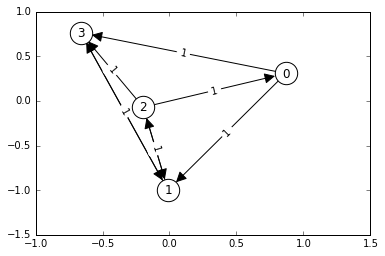

In [61]:
# Please execute this cell (it is not an exercise !)


def draw_mat(mat):
    """ For nice pointed arrows you need networkx >= 2.2

        To install  networkx version 2.2:

        Anaconda Prompt

        conda install networkx==2.2

        and then y when it asks to install the packages

        after installation, go to  Jupyter and do  
        - Kernel->Shutdown
        -  Kernel->Restart  
        - reexecute the cell with  def draw_mat

        if it still doesn't work, close and reopen Jupyter !    
    """
    
    import numpy as np
    import networkx as nx
    import matplotlib
    %matplotlib inline
    
    self_loops = []
    for i in range(len(mat)):
        if mat[i][i] != 0 or mat[i] == True:
            self_loops.append(i)
    if len(self_loops) > 0:
        print()
        print("NOTE: matrix contains self loops for nodes %s but currently draw_mat does not visualize them " % self_loops)
    
    m = np.matrix(mat)

    g=nx.DiGraph(m)
    pos = nx.spring_layout(g, seed=0)

    nx.draw_networkx(g,pos, arrowsize=22, node_color='white', node_size=500)
    if not isinstance(mat[0][0], bool):
        edge_labels = nx.get_edge_attributes(g, 'weight', )
        nx.draw_networkx_edge_labels(g, pos, arrowsize=22, node_color='white', node_size=500, edge_labels = edge_labels)
        
    
mat = [
    [1,1,0,1],  # node 0 is linked to node 0 itself, node 1 and node 2
    [0,0,1,1],  # node 1 is linked to node 1, node 2 and node 3
    [1,1,1,1],  # node 2 is linked to node 0, node 1, node 2 itself and node 3
    [0,1,0,1]   # node 3 is linked to node 1 and node 3 itself
  ]

#### Visualization example

# notice links with weigth zero are not shown)
draw_mat(mat)

#### Changing weights

Depending on the problem at hand, it may be reasonable to change the weights. For example, on a road network the nodes could represent places and the weights could be street lenghts. Such a matrix is called  _distance matrix_, and it is has the property of being symmetric along the diagonal. Talking about the diagonal, for the special case of going from a place to itself, we set that street length to 0 (which make sense for street length but could give troubles for other purposes, for example if we give the numbers the meaning 'is connected' a place should always be connected to itself)

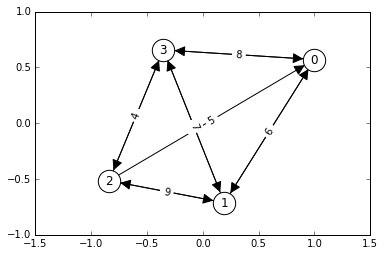

In [62]:
mat = [
        [0,6,0,8],  # place 0 is linked to place 1 and place 2
        [6,0,9,7],  # place 1 is linked to place 0, place 2 and place 3
        [5,9,0,4],  # place 2 is linked to place 0, place 1 and place 3
        [8,7,4,0]   # place 3 is linked to place 0, place 1, place 2 and place 3 itself
      ]


draw_mat(mat)

If we are not interested at all in the weights, we might use only zeroes and ones as we did before. But this could have implications when doing operations on matrices, so some times it is better to use only `True` and `False`


NOTE: matrix contains self loops for nodes [1, 2] but currently draw_mat does not visualize them 


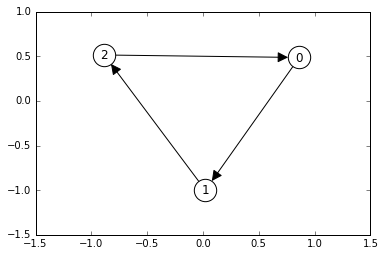

In [46]:
mat = [
    [False, True, False],
    [False, True, True],
    [True, False, True],
    
]
draw_mat(mat)

We are now ready to start to implement the following functions. Before even start implementation, for each try to interpret the matrix as a graph, drawing it on paper. When you're done implementing try to use `draw_mat` on the results.  Notice that since `draw_mat`  is a generic display function and knows nothing about the nature of the graph, sometimes it will  not show the graph in the optimal way we humans would use.

### line

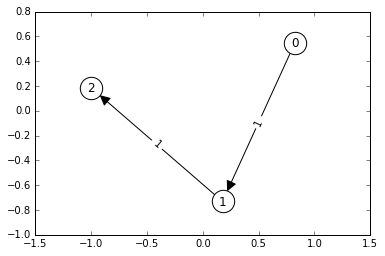

In [47]:

def line(n):
    """ RETURN a matrix as lists of lists where node i must have an edge to  to node i + 1 with weight 1
        Last node points to nothing
        n must be >= 1, otherwise rises ValueError
    """
    #jupman-raise
    if n < 1:
        raise ValueError("Invalid n %s" % n)
    ret = [[0]*n for i in range(n)]
    for i in range(n-1):
        ret[i][i+1] = 1
    return ret
    #/jupman-raise
    
assert line(1) == [
                    [0]
                  ]
assert line(2) == [
                    [0,1],
                    [0,0]
                  ]
assert line(3) == [
                    [0,1,0],
                    [0,0,1],
                    [0,0,0]
                  ]

draw_mat(line(3))

### utriang

You will try to create an upper triangular matrix of side `n`. What could possibly be the graph interpretation of such a matrix?


NOTE: matrix contains self loops for nodes [0, 1, 2, 3] but currently draw_mat does not visualize them 


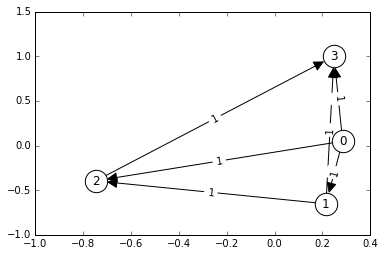

In [48]:
def utriang(n):
    """ RETURN a matrix of size nxn which is upper triangular, that is, has all nodes below the diagonal 0, whle 
        all the other nodes are set to 1
    """
    #jupman-raise
    ret = []
    for i in range(n):
        row = []
        for j in range(n):
            if j < i:
                row.append(0)
            else:
                row.append(1)
        ret.append(row)
    return ret
    #/jupman-raise

assert utriang(1) == [
    [1]
]
assert utriang(2) == [
    [1,1],
    [0,1]
]
assert utriang(3) == [
    [1,1,1],
    [0,1,1],
    [0,0,1]
]
assert utriang(4) == [
    [1,1,1,1],
    [0,1,1,1],
    [0,0,1,1],
    [0,0,0,1]
]


draw_mat(utriang(4))


NOTE: matrix contains self loops for nodes [3] but currently draw_mat does not visualize them 


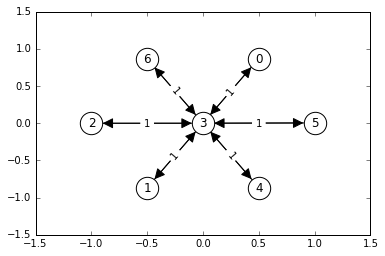

In [49]:

def cross(n):
    """ RETURN a nxn matrix filled with zeros except on the crossing lines.
    
        Example for n=7 :
        
        0001000
        0001000
        0001000
        1111111
        0001000
        0001000
        0001000
        
        n must be >=1 and odd, otherwise a ValueError is thrown
    """
    #jupman-raise
    if n < 1 or n % 2 == 0:
        raise ValueError("Invalid n %s" % n)    
    ret = [[0]*n for i in range(n)]
    for i in range(n):
        ret[n//2 ][i] = 1
        ret[i][n//2] = 1
    return ret
    #/jupman-raise

assert cross(1) == [
    [1]
]
assert cross(3) == [
    [0,1,0],
    [1,1,1],
    [0,1,0]
]

assert cross(5) == [
    [0,0,1,0,0],
    [0,0,1,0,0],
    [1,1,1,1,1],
    [0,0,1,0,0],
    [0,0,1,0,0]
]

draw_mat(cross(7))

### remove_node

Here the function text is not so precise, as it is talking about nodes but you have to operate on a matrix. Can you guess exactly what you have to do ? In your experiments, try to draw the matrix before and after executing `remove_node`


NOTE: matrix contains self loops for nodes [0, 1, 2] but currently draw_mat does not visualize them 


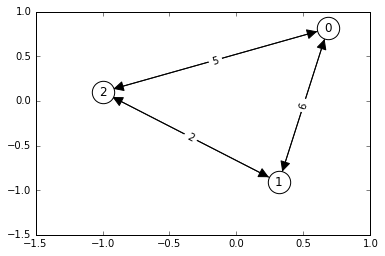

In [50]:
def remove_node(mat, i):
    """ MODIFIES mat by removing node i
    """
    #jupman-raise
    del mat[i]
    for row in mat:
        del row[i]
    #/jupman-raise
    
m  = [
        [3,5,2,5],
        [6,2,3,7],
        [4,2,1,2],
        [7,2,2,6]
     ]        

remove_node(m,2)

assert len(m) == 3
for i in range(3):
    assert len(m[i]) == 3
    
draw_mat(m)

### is_subgraph

If we interpret a matrix as graph, we may wonder when a graph A is a subgraph of another graph B, that is, when A nodes are a subset of B nodes and when A edges are a subset of B edges. For convenience, here we only consider graphs having the same `n` nodes. Edges may instead may vary. Graphs are represented as boolean matrices.

In [51]:
def is_subgraph(A, B):
    """ RETURN True is A is a subgraph of B, that is, some or all of its edges also belong to B.
        A and B are boolean matrices of size nxn. If sizes don't match, raises ValueError
    """
    #jupman-raise
    n = len(A)
    m = len(B)
    if n != m:
        raise ValueError("A size %s and B size %s  should match !" % (n,m))
    for i in range(n):
        for j in range(n):
            if A[i][j] and not B[i][j]:
                return False
    return True
    #/jupman-raise

ma = [
   [False]   
]

mb = [
    [False]
]


assert is_subgraph(ma, mb) == True


ma = [
   [False]   
]

mb = [
    [True]
]


assert is_subgraph(ma, mb) == True


ma = [
   [True]   
]

mb = [
    [True]
]


assert is_subgraph(ma, mb) == True

ma = [
   [True]   
]

mb = [
    [False]
]


assert is_subgraph(ma, mb) == False

ma = [
   [True, False],
   [True, False], 
]

mb = [
    [True, False],
    [True, True],
]


assert is_subgraph(ma, mb) == True

ma = [
    [False, False, True],
    [True, True,True],
    [True, False,True],
]

mb = [
    [True, False, True],
    [True, True,True],
    [True, True,True],
]


assert is_subgraph(ma, mb) == True

### pyramid

The following function requires to create a matrix filled with non-zero numbers. Even if don't know exactly the network meaning, with ust this fact we can conclude that all nodes are linked to all others. A graph where this happens is called a _clique_ (the Italian name is _cricca_  - where have you already seen it? ;-)


NOTE: matrix contains self loops for nodes [0, 1, 2, 3, 4] but currently draw_mat does not visualize them 


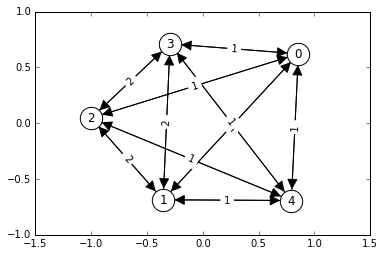

In [59]:
def pyramid(n):
    """
        Takes an odd number n >= 1 and RETURN a matrix as list of lists containing numbers displaced like this
        example for a pyramid of square 7:
        if n is even, raises ValueError 

        1111111
        1222221   
        1233321 
        1234321
        1233321
        1222221
        1111111
    """            
    #jupman-raise
    if n % 2 == 0:
        raise ValueError("n should be odd, found instead %s" % n)
    ret = [[0]*n for i in range(n)]
    for i in range(n//2 + 1):
        for j in range(n//2 +1):
            ret[i][j] = min(i, j) + 1
            ret[i][n-j-1] = min(i, j) + 1
            ret[n-i-1][j] = min(i, j) + 1
            ret[n-i-1][n-j-1] = min(i, j) + 1
        
    ret[n//2][n//2] = n // 2 + 1
    return ret
    #/jupman-raise

try: 
    pyramid(4)
    raise Exception("SHOULD HAVE FAILED!")
except ValueError:
    "passed test"
    
assert pyramid(1) == [
                        [1]
                    ]

assert pyramid(3) == [
                        [1,1,1],
                        [1,2,1],
                        [1,1,1]
                    ]

assert pyramid(5) == [
                        [1, 1, 1, 1, 1],
                        [1, 2, 2, 2, 1], 
                        [1, 2, 3, 2, 1], 
                        [1, 2, 2, 2, 1], 
                        [1, 1, 1, 1, 1]
                    ]

draw_mat(pyramid(5))
